In [1]:
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt
import xarray as xr
import matplotlib
from matplotlib import colors
from matplotlib import cm
from matplotlib.colors import ListedColormap

import sys
sys.path.append('/Volumes/KT-TOSHIBA/ENOI/CODE')
import regression_fcts as rf
import cartopy.crs as ccrs
import enoi_functions as enoi

In [2]:
lon = np.arange(0.5,360.5)
lat = np.arange(-89.5,90.5)

In [3]:
mdata = '/Volumes/KT-TOSHIBA/ENOI/sorted_model_data/'

dissic_SORTED = np.load(f'{mdata}dic_100.npy')

In [4]:
ul = [100, 500, 1000]
ll = [500, 1000, 2000]

lab1 = ['a', 'b', 'c']
lab2 = ['d', 'e', 'f']
lab3 = ['g', 'h', 'i']

In [ ]:
fig, axs = plt.subplots(nrows=3,ncols=3,
                        subplot_kw={'projection': ccrs.Robinson(central_longitude=180)},
                        figsize=(9.5,7.5))

for i in np.arange(len(ul)):
    c = xr.open_dataset(f"c_{ul[i]}_{ll[i]}.nc") 
    _ , lmask = enoi.create_mask(dissic_SORTED, f'{mdata}mask_{ll[i]}.npy')
    co2 = np.ma.masked_where(lmask,c.cCO2)
    t = np.ma.masked_where(lmask,c.cT)
    s = np.ma.masked_where(lmask,c.cS)
      
    axs[0,i].pcolormesh(lon, lat, co2, 
                        transform=ccrs.PlateCarree(central_longitude=0.0, globe=None),
                        vmin=-.25, vmax=.25, cmap=plt.get_cmap("RdBu_r"))
    axs[0,i].coastlines('50m')
    axs[0,i].set_title(f"({lab1[i]}) pCO$_2$ coeff, {ul[i]}m-{ll[i]}m")
    
    axs[1,i].pcolormesh(lon, lat, t, 
                        transform=ccrs.PlateCarree(central_longitude=0.0, globe=None),
                        vmin=-.1, vmax=.1, cmap=plt.get_cmap("RdBu_r"))
    axs[1,i].coastlines('50m')
    axs[1,i].set_title(f"({lab2[i]}) T' coeff, {ul[i]}m-{ll[i]}m")
    
    axs[2,i].pcolormesh(lon, lat, s, 
                        transform=ccrs.PlateCarree(central_longitude=0.0, globe=None),
                        vmin=-1, vmax=1, cmap=plt.get_cmap("RdBu_r"))
    axs[2,i].coastlines('50m')
    axs[2,i].set_title(f"({lab3[i]}) S' coeff, {ul[i]}m-{ll[i]}m")
    
plt.tight_layout()
plt.savefig('pc_manuscript_figures/coeff_dense_depth.png', format='png', dpi=150, bbox_inches='tight')

/Volumes/KT-TOSHIBA/ENOI/CODE/enoi_functions.py:94: RuntimeWarning: invalid value encountered in divide
  test1 = np.isnan(np.mean(input_file/input_file, axis=0)) # find where model ensemble doesnt always have data
/Volumes/KT-TOSHIBA/ENOI/CODE/enoi_functions.py:94: RuntimeWarning: invalid value encountered in divide
  test1 = np.isnan(np.mean(input_file/input_file, axis=0)) # find where model ensemble doesnt always have data
/Volumes/KT-TOSHIBA/ENOI/CODE/enoi_functions.py:94: RuntimeWarning: invalid value encountered in divide
  test1 = np.isnan(np.mean(input_file/input_file, axis=0)) # find where model ensemble doesnt always have data


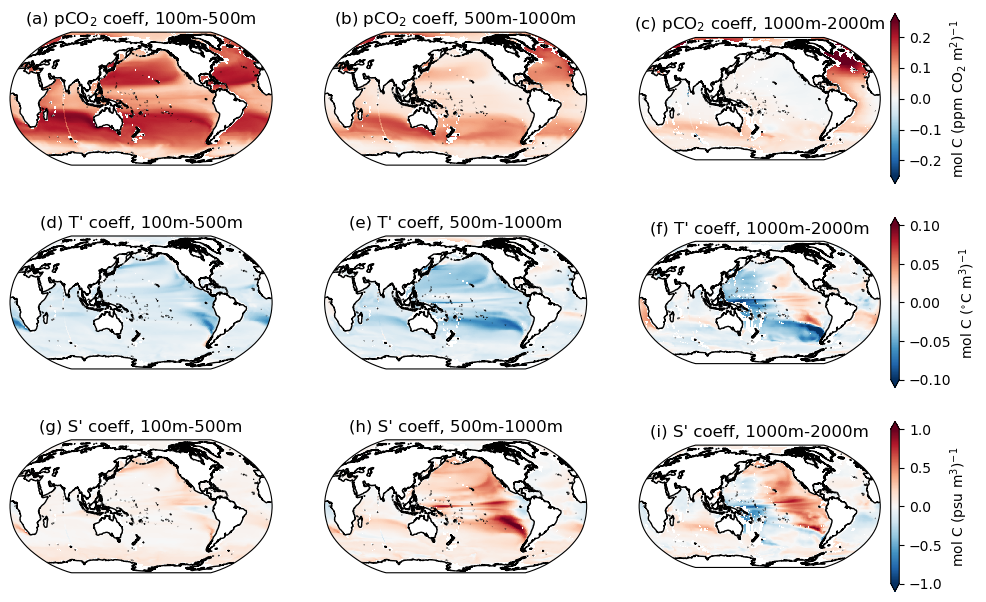

In [13]:
fig, axs = plt.subplots(nrows=3,ncols=3,
                        subplot_kw={'projection': ccrs.Robinson(central_longitude=180)},
                        figsize=(11.5,7.5))

for i in np.arange(3):
    c = xr.open_dataset(f"c_{ul[i]}_{ll[i]}.nc") 
    _ , lmask = enoi.create_mask(dissic_SORTED, f'{mdata}mask_{ll[i]}.npy')
    co2 = np.ma.masked_where(lmask,c.cCO2)
    t = np.ma.masked_where(lmask,c.cT)
    s = np.ma.masked_where(lmask,c.cS)
      
    im0 = axs[0,i].pcolormesh(lon, lat, co2, 
                        transform=ccrs.PlateCarree(central_longitude=0.0, globe=None),
                        vmin=-.25, vmax=.25, cmap=plt.get_cmap("RdBu_r"))
    axs[0,i].coastlines('50m')
    axs[0,i].set_title(f"({lab1[i]}) pCO$_2$ coeff, {ul[i]}m-{ll[i]}m")
    
    im1 = axs[1,i].pcolormesh(lon, lat, t, 
                        transform=ccrs.PlateCarree(central_longitude=0.0, globe=None),
                        vmin=-.1, vmax=.1, cmap=plt.get_cmap("RdBu_r"))
    axs[1,i].coastlines('50m')
    axs[1,i].set_title(f"({lab2[i]}) T' coeff, {ul[i]}m-{ll[i]}m")
    
    im2 = axs[2,i].pcolormesh(lon, lat, s, 
                        transform=ccrs.PlateCarree(central_longitude=0.0, globe=None),
                        vmin=-1, vmax=1, cmap=plt.get_cmap("RdBu_r"))
    axs[2,i].coastlines('50m')
    axs[2,i].set_title(f"({lab3[i]}) S' coeff, {ul[i]}m-{ll[i]}m")
    
    if i==len(ul)-1: #for formatting the colorbars and labels
        
        cb0 = plt.colorbar(im0,ax=axs[0,i], fraction=0.04, pad=0.04, orientation="vertical", extend = "both")
        cb0.set_label("mol C (ppm CO$_2$ m$^2$)$^{-1}$")
        cb1 = plt.colorbar(im1,ax=axs[1,i], fraction=0.04, pad=0.04, orientation="vertical", extend = "both")
        cb1.set_label("mol C ($^{\circ}$C m$^3$)$^{-1}$")
        cb2 = plt.colorbar(im2,ax=axs[2,i], fraction=0.04, pad=0.04, orientation="vertical", extend = "both")
        cb2.set_label("mol C (psu m$^3$)$^{-1}$")
        
#plt.tight_layout()
plt.savefig('pc_manuscript_figures/coeff_dense_labels.png', format='png', dpi=150, bbox_inches='tight')